In [480]:
# Script to explore the Adverse Weather scenarios
# Analysis of frequency of exceedances and co-ocurrences
# Visulization maps
# Noelia Otero. Energy-Climate Hacktahon 2021


import pandas as pd
import geopandas as gpd
import numpy as np
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from cartopy.feature import NaturalEarthFeature
from itertools import accumulate
import Utils_explore
import os 

In [481]:
# files
maindir = '/badc/deposited2021/adverse_met_scenarios_electricity/data/'
# read UREAD
udir = '/gws/pw/j05/cop26_hackathons/oxford/Data/UREAD_energy_timeseries'
demand_f   = pd.read_csv(udir + '/demand_model_outputs/ERA5_weather_dependent_demand_all_countries_1979_2019_hourly.csv')
wind_f = pd.read_csv(udir + '/wind_power_model_outputs/ERA5_wind_power_capacity_factor_all_countries_1979_2019_inclusive.csv')
solar_f = pd.read_csv(udir + '/solar_power_model_outputs/ERA5_solar_power_capacity_factor_all_countries_1979_2019_hourly.csv')



In [482]:
# Select the type of adverse scenerio (e.g. most extreme, 1_in_100year ...) and number of event (there are 3)
# Parameters for read_files
#type_event = "most_extreme_events"
#n_event ='event1'
# variables
#n_var = ['ssr','tas','windspeed']
#dat='summer_wind_drought' # this could be surplus , winter drought
#n_type='duration'


In [505]:
# Here I focused on summer and winter wind drought
# Wind droguht summer
vars_mostex_D_e1=read_efiles('most_extreme_events', 'event1', n_var,'duration', 'summer_wind_drought' )
vars_mostex_S_e1=read_efiles('most_extreme_events', 'event1', n_var, 'severity','summer_wind_drought' )
# Winter
vars_W_mostex_D_e1=read_efiles('most_extreme_events', 'event1', n_var,'duration', 'winter_wind_drought' )
vars_W_mostex_S_e1=read_efiles('most_extreme_events', 'event1', n_var, 'severity','winter_wind_drought' )


## Summer wind drougth

In [506]:
# Duration

In [507]:
ex_temp, max_temp=sumdays_th(vars_mostex_D_e1[1],'t2m',0.90, 'high')
ex_lowtemp, max_lowtemp=sumdays_th(vars_mostex_D_e1[1],'t2m',0.10, 'low')
ex_ssr, max_ex_ssr=sumdays_th(vars_mostex_D_e1[0],'ssr',0.90, 'high')
ex_lowssr, max_ex_lowssr=sumdays_th(vars_mostex_D_e1[0],'ssr',0.10, 'low')
# Wind- use fixed threshold
ex_wind, max_wind=sumdays_th(vars_mostex_D_e1[2],'wind_speed',20, 'high')
ex_lowwind, max_lowwind=sumdays_th(vars_mostex_D_e1[2],'wind_speed',5, 'low')
# For wind we can see the total number of day above 22 and below 5
tot_ex_wind= ex_wind.sum(dim='time')
tot_ex_lowwind= ex_lowwind.sum(dim='time')
seas_highwind=ex_wind.groupby('time.season').sum(dim='time')
seas_low_wind=ex_lowwind.groupby('time.season').sum(dim='time')

/opt/jaspy/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1283: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [508]:
# Severity event
exS_temp, maxS_temp=sumdays_th(vars_mostex_S_e1[1],'t2m',0.90, 'high')
exS_lowtemp, maxS_lowtemp=sumdays_th(vars_mostex_S_e1[1],'t2m',0.10, 'low')
exS_ssr, maxS_ex_ssr=sumdays_th(vars_mostex_S_e1[0],'ssr',0.90, 'high')
exS_lowssr, maxS_ex_lowssr=sumdays_th(vars_mostex_S_e1[0],'ssr',0.10, 'low')

# Wind- use fixed threshold
exS_wind, maxS_wind=sumdays_th(vars_mostex_S_e1[2],'wind_speed',20, 'high')
exS_lowwind, maxS_lowwind=sumdays_th(vars_mostex_S_e1[2],'wind_speed',5, 'low')
# For wind we can see the total number of day above 22 and below 5
totS_ex_wind= exS_wind.sum(dim='time')
totS_ex_lowwind= exS_lowwind.sum(dim='time')
seas_S_highwind=exS_wind.groupby('time.season').sum(dim='time')
seas_S_low_wind=exS_lowwind.groupby('time.season').sum(dim='time')

## Winter wind drought

In [ ]:
# duration 

In [511]:
ex_W_temp, max_W_temp=sumdays_th(vars_W_mostex_D_e1[1],'t2m',0.90, 'high')
ex_W_lowtemp, max_W_lowtemp=sumdays_th(vars_W_mostex_D_e1[1],'t2m',0.10, 'low')
ex_W_ssr, max_W_ex_ssr=sumdays_th(vars_W_mostex_D_e1[0],'ssr',0.90, 'high')
ex_W_lowssr, max_W_ex_lowssr=sumdays_th(vars_W_mostex_D_e1[0],'ssr',0.10, 'low')
# Wind- use fixed threshold
ex_W_wind, max_W_wind=sumdays_th(vars_W_mostex_D_e1[2],'wind_speed',20, 'high')
ex_W_lowwind, max_W_lowwind=sumdays_th(vars_W_mostex_D_e1[2],'wind_speed',5, 'low')
# For wind we can see the total number of day above 22 and below 5
tot_ex_W_wind= ex_W_wind.sum(dim='time')
tot_ex_W_lowwind= ex_W_lowwind.sum(dim='time')
seas_W_highwind=ex_W_wind.groupby('time.season').sum(dim='time')
seas_W_low_wind=ex_W_lowwind.groupby('time.season').sum(dim='time')

## Summer drought (duration)

## Number of days of low wind speed (<5m/s)

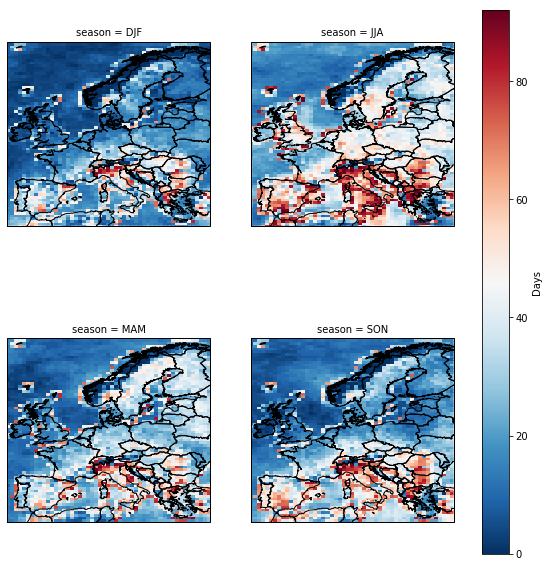

In [512]:
vis_season(seas_low_wind.wind_speed)

##  Winter drought (duration) 

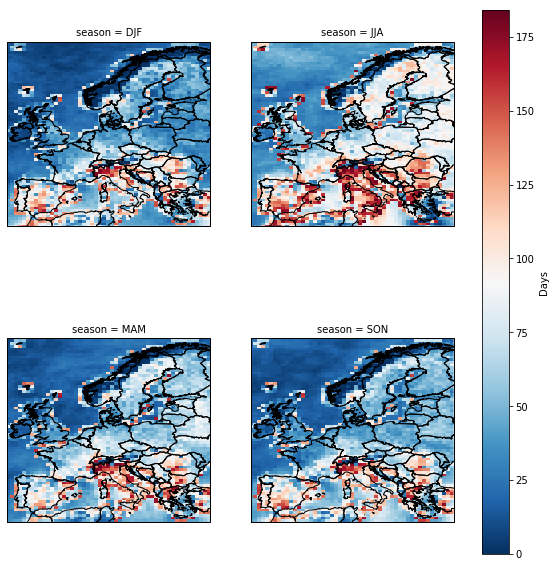

In [514]:
# low wind
vis_season(seas_W_low_wind.wind_speed)

## Summer wind drought

## Number of high wind speed (>20m/s)

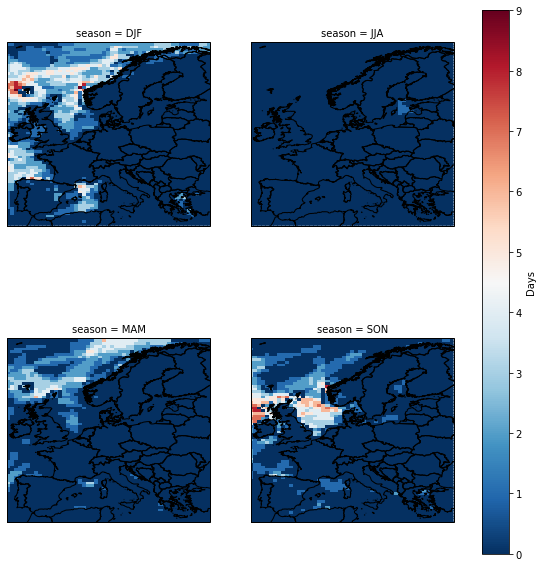

In [515]:
vis_season(seas_highwind.wind_speed)

## Winter wind drougth

In [ ]:
#high wind

/opt/jaspy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


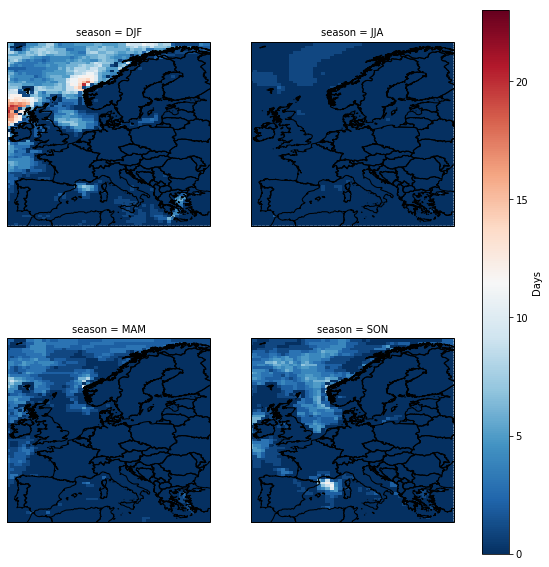

In [516]:
vis_season(seas_W_highwind.wind_speed)

In [517]:
## Compound temperature - wind

In [520]:
# Frequency of high temperature and low wind
CE_highT_lowW = compound_T2wind(ex_temp, ex_lowwind)
# Frequency of low temperature and low wind
CE_lowT_lowW = compound_T2wind(ex_lowtemp, ex_lowwind)
# Frequency of low temperature and low wind
CE_lowT_highW = compound_T2wind(ex_lowtemp, ex_wind)
# Frequency of low temperature and low wind
CE_highT_highW = compound_T2wind(ex_temp, ex_wind)

In [521]:
# Seasonal frequency
CE_highT_lowW_seas=CE_highT_lowW.groupby('time.season').sum(dim='time')
CE_lowT_lowW_seas=CE_lowT_lowW.groupby('time.season').sum(dim='time')
CE_lowT_highW_seas=CE_lowT_highW.groupby('time.season').sum(dim='time')
CE_highT_highW_seas=CE_highT_highW.groupby('time.season').sum(dim='time')


In [522]:
# same for winter drougth
# Frequency of high temperature and low wind
CE_W_highT_lowW = compound_T2wind(ex_W_temp, ex_W_lowwind)
# Frequency of low temperature and low wind
CE_W_lowT_lowW = compound_T2wind(ex_W_lowtemp, ex_W_lowwind)
# Frequency of low temperature and low wind
CE_W_lowT_highW = compound_T2wind(ex_W_lowtemp, ex_W_wind)
# Frequency of low temperature and low wind
CE_W_highT_highW = compound_T2wind(ex_W_temp, ex_W_wind)

In [523]:
# Seasonal frequency
CE_W_highT_lowW_seas=CE_W_highT_lowW.groupby('time.season').sum(dim='time')
CE_W_lowT_lowW_seas=CE_W_lowT_lowW.groupby('time.season').sum(dim='time')
CE_W_lowT_highW_seas=CE_W_lowT_highW.groupby('time.season').sum(dim='time')
CE_W_highT_highW_seas=CE_W_highT_highW.groupby('time.season').sum(dim='time')

## Summer wind drought

## Compound high temperature (>90th) and low wind speed (<5m/sg)

/opt/jaspy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


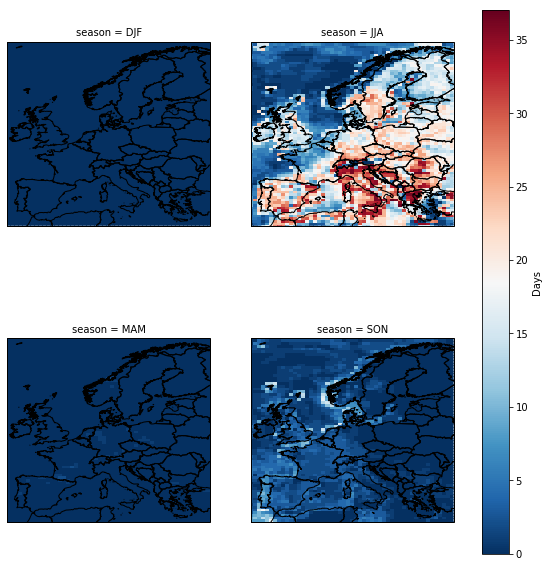

In [524]:
vis_season(CE_highT_lowW_seas)

## Winter drougth ( high temperature and low wind speed)

/opt/jaspy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


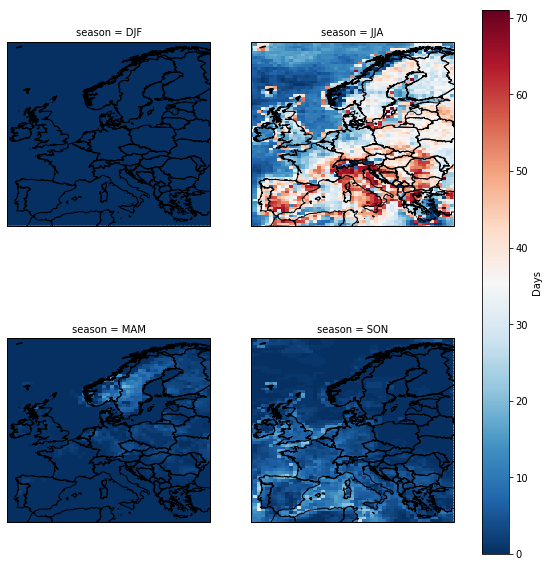

In [526]:
vis_season(CE_W_highT_lowW_seas)

## Summer wind drougth

## Compound low temperature (<10th) and low wind (<5ms)

/opt/jaspy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


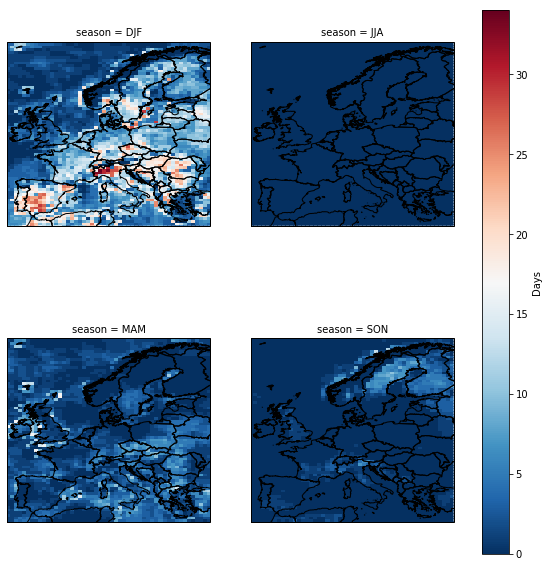

In [527]:
vis_season(CE_lowT_lowW_seas)

## Winter drought

## Compound low temperature (<10th) and low wind (<5ms)

/opt/jaspy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


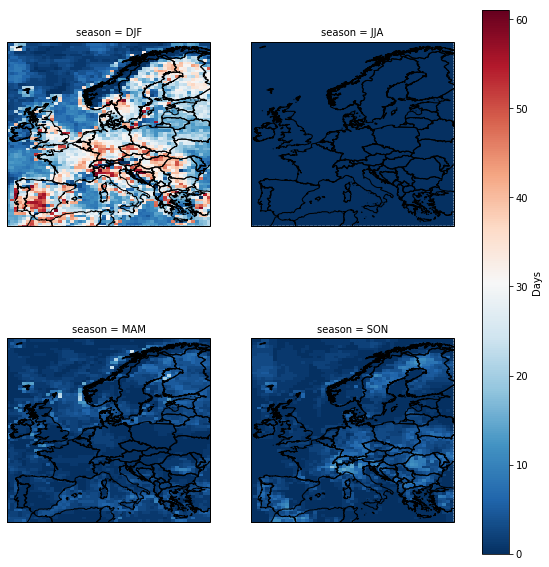

In [528]:
vis_season(CE_W_lowT_lowW_seas)